<a href="https://colab.research.google.com/github/NaingKo9902/-4/blob/master/DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Enable inline plots
%matplotlib inline
# Set plot style
sns.set(style="ticks")
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [0]:
pd.set_option("display.width", 70)

In [0]:
data = pd.read_csv("./SolarPrediction.csv")

In [0]:
data["Time"] = (pd
.to_datetime(data["UNIXTime"], unit="s", utc=True)
.dt.tz_convert("Pacific/Honolulu")).dt.time
data["TimeSunRise"] = (pd
.to_datetime(data["TimeSunRise"],
infer_datetime_format=True)
.dt.time)
data["TimeSunSet"] = (pd
.to_datetime(data["TimeSunSet"],
infer_datetime_format=True)
.dt.time)
data = data.rename({"WindDirection(Degrees)": "WindDirection"},
axis=1)

In [6]:
data.dtypes

UNIXTime           int64
Data              object
Time              object
Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
TimeSunRise       object
TimeSunSet        object
dtype: object

In [7]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [0]:
def time_to_second(t):
  return ((datetime.combine(datetime.min, t) - datetime.min)
    .total_seconds())

In [9]:
df = data.copy()
timeInSeconds = df["Time"].map(time_to_second)
sunrise = df["TimeSunRise"].map(time_to_second)
sunset = df["TimeSunSet"].map(time_to_second)
df["DayPart"] = (timeInSeconds - sunrise) / (sunset - sunrise)
df = df.drop(["UNIXTime", "Data", "Time",
"TimeSunRise", "TimeSunSet"], axis=1)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
0,1.21,48,30.46,59,177.39,5.62,1.475602
1,1.21,48,30.46,58,176.78,3.37,1.468588
2,1.23,48,30.46,57,158.75,3.37,1.461713
3,1.21,48,30.46,60,137.71,3.37,1.454653
4,1.17,48,30.46,62,104.95,5.62,1.447778


In [10]:
df.dtypes

Radiation        float64
Temperature        int64
Pressure         float64
Humidity           int64
WindDirection    float64
Speed            float64
DayPart          float64
dtype: object

In [11]:
df.shape

(32686, 7)

In [12]:
df.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,0.482959
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.602432
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,-0.634602
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,-0.040139
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,0.484332
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,1.006038
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,1.566061


In [13]:
df.isnull().sum()

Radiation        0
Temperature      0
Pressure         0
Humidity         0
WindDirection    0
Speed            0
DayPart          0
dtype: int64

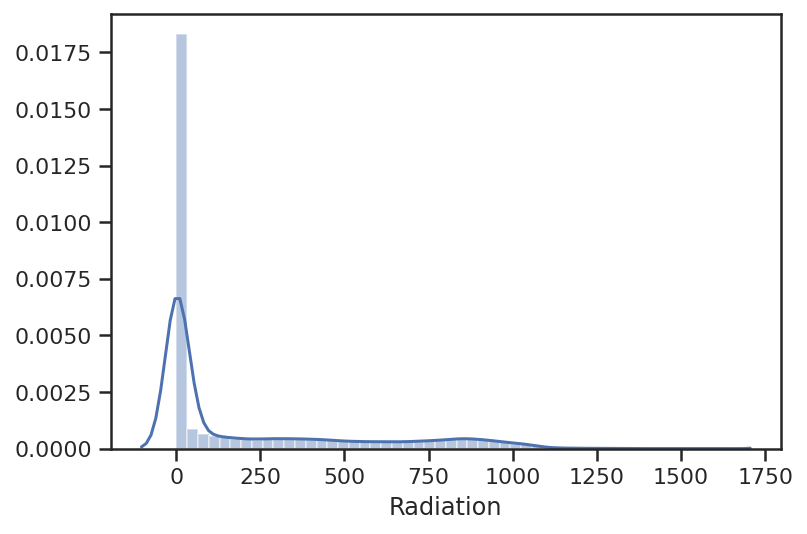

In [14]:
sns.distplot(df["Radiation"]);

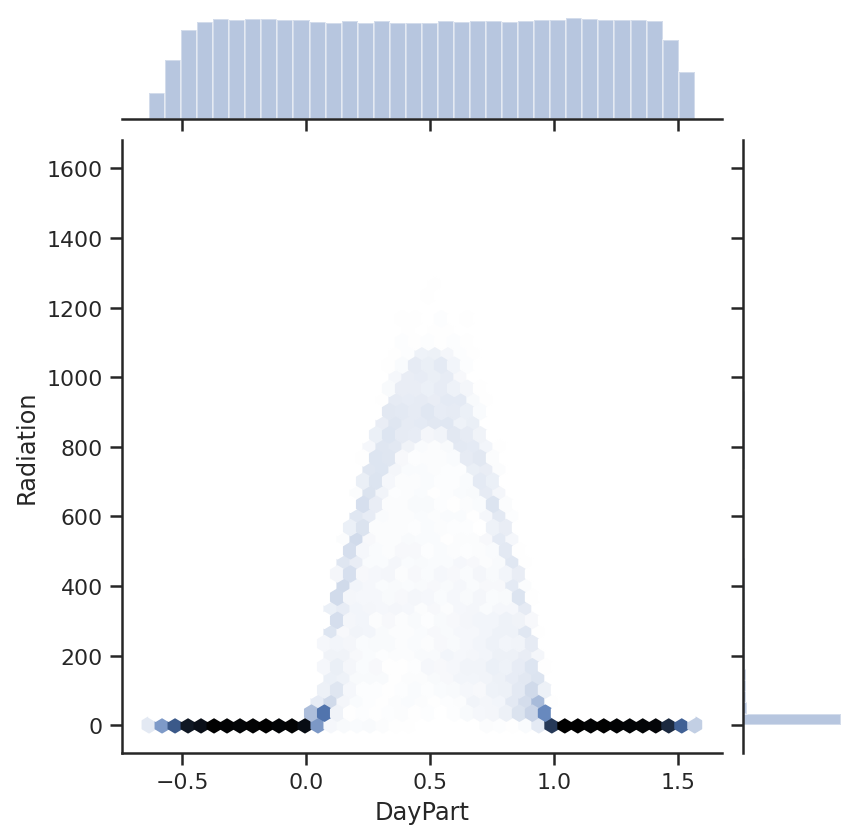

In [15]:
sns.jointplot(x="DayPart", y="Radiation", data=df, kind="hex");

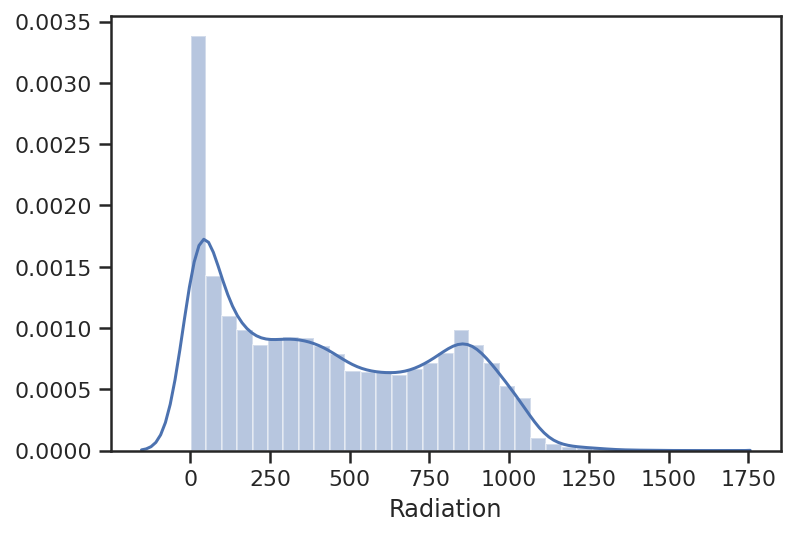

In [16]:
dfd = df[(df["DayPart"] >= 0) & (df["DayPart"] <= 1)]
sns.distplot(dfd["Radiation"]);

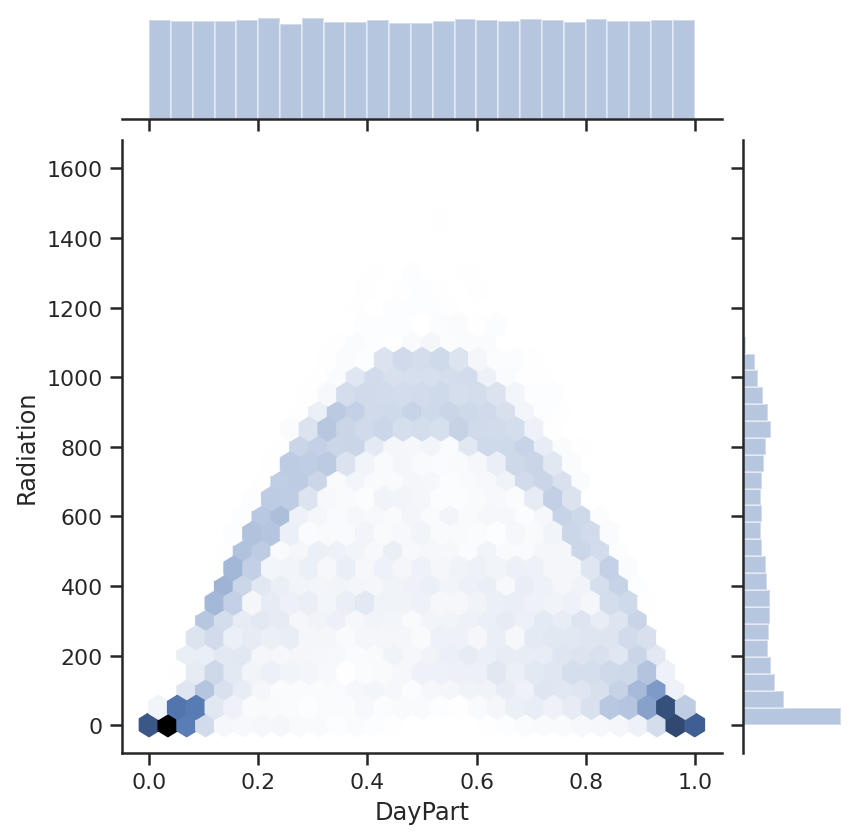

In [17]:
sns.jointplot(x="DayPart", y="Radiation", data=dfd, kind="hex");

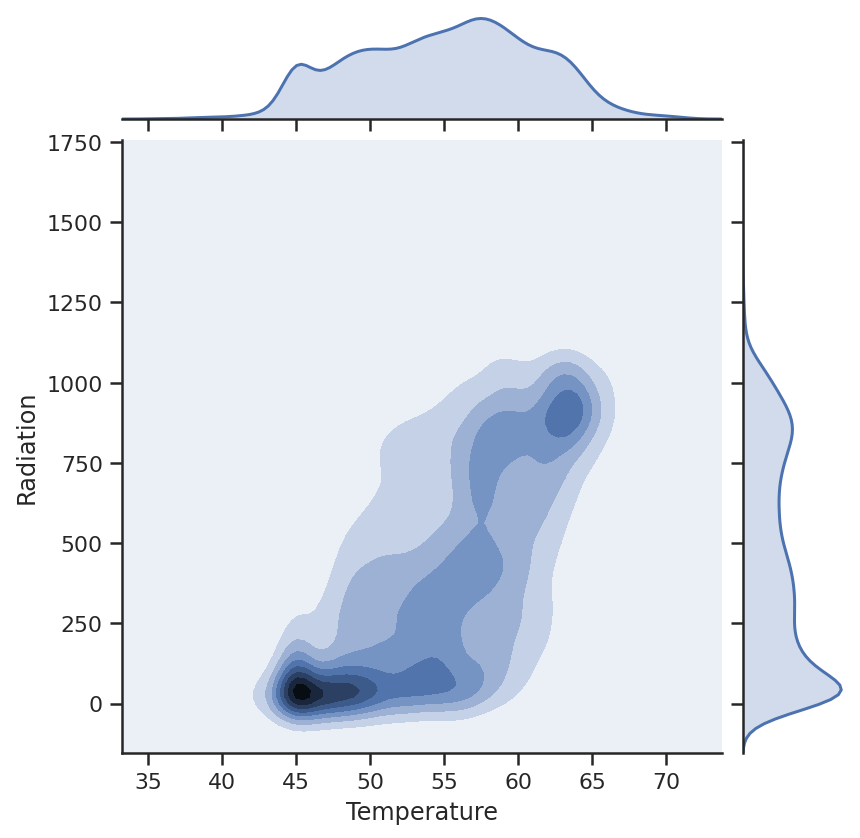

In [18]:
sns.jointplot(x="Temperature", y="Radiation", data=dfd, kind="kde");

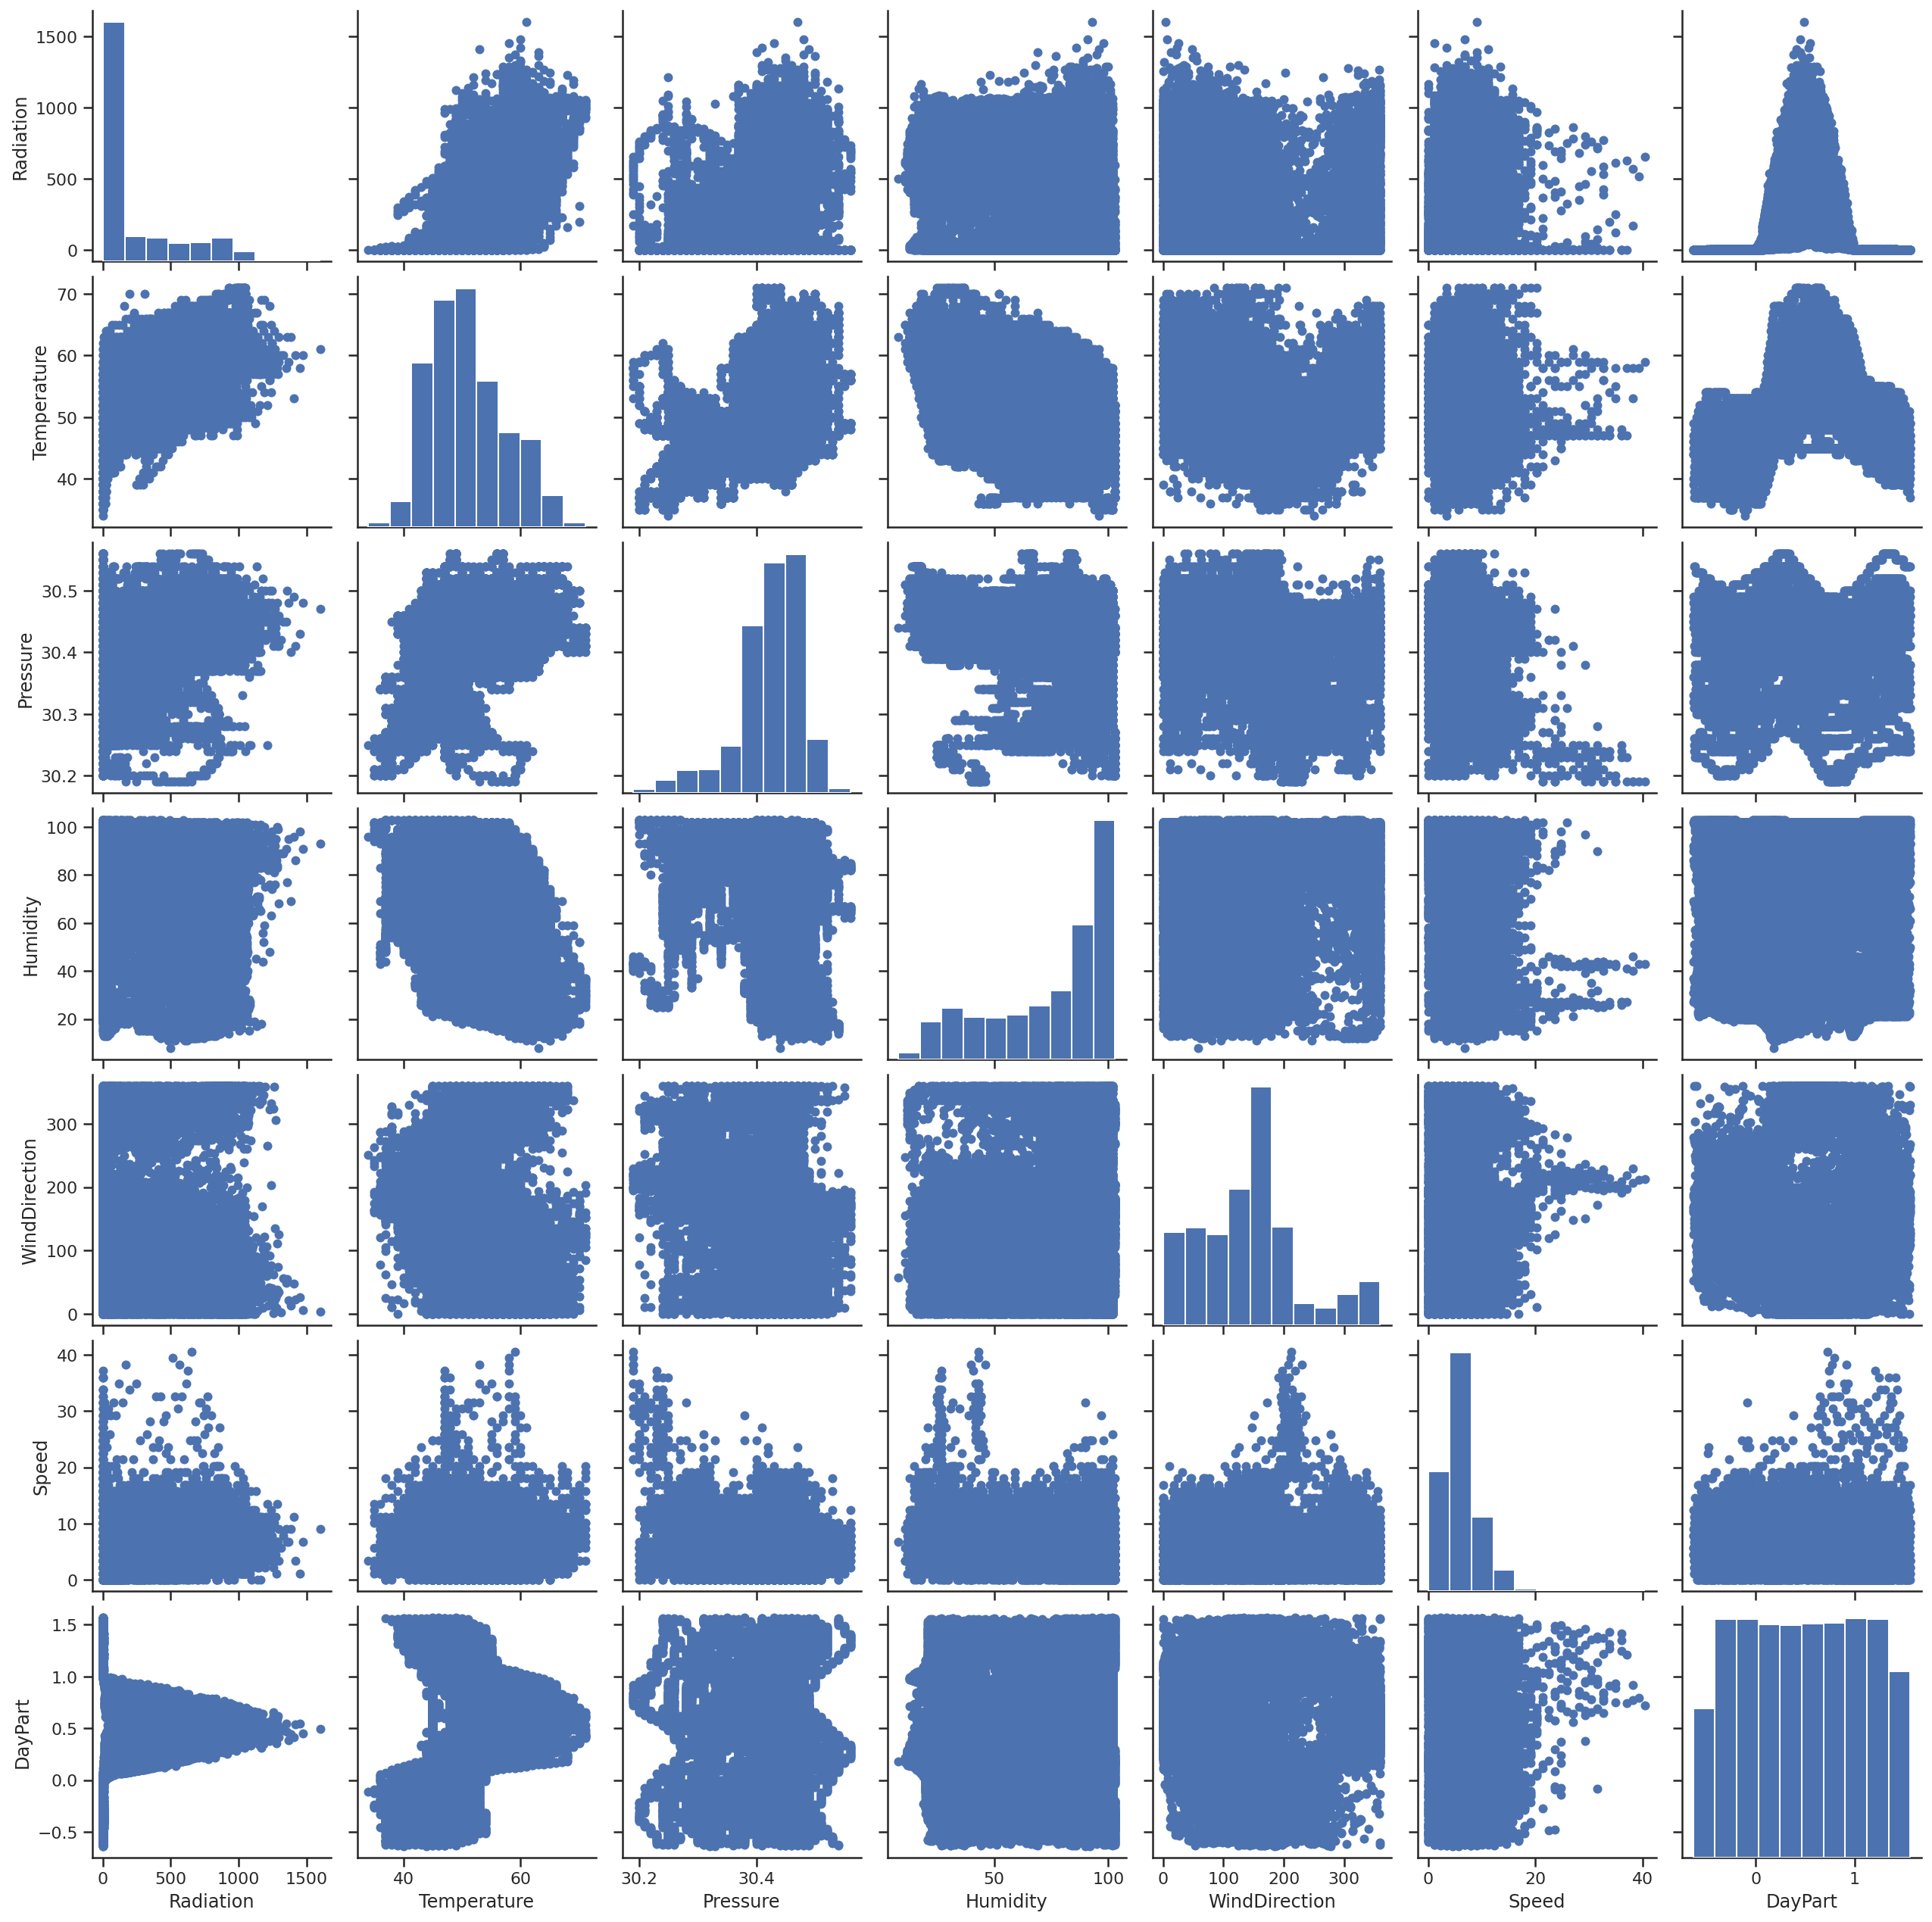

In [19]:
sns.pairplot(df, plot_kws=dict(linewidth=0));

In [20]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,0.005980
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,0.198520
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,0.094403
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,0.075513
WindDirection,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,-0.078130
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,-0.056095
DayPart,0.005980,0.198520,0.094403,0.075513,-0.078130,-0.056095,1.000000


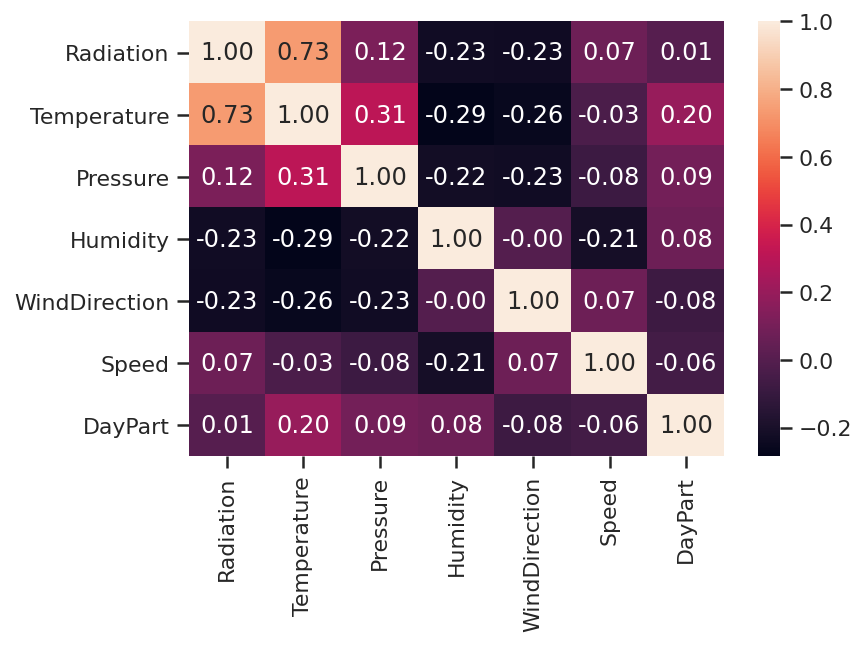

In [21]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [0]:
X = df.drop("Radiation", axis=1)
y = df["Radiation"]

In [23]:
print(X.head(), "\n")
print(y.head())

   Temperature  Pressure  Humidity  WindDirection  Speed   DayPart
0           48     30.46        59         177.39   5.62  1.475602
1           48     30.46        58         176.78   3.37  1.468588
2           48     30.46        57         158.75   3.37  1.461713
3           48     30.46        60         137.71   3.37  1.454653
4           48     30.46        62         104.95   5.62  1.447778 

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64


In [24]:
print(X.shape)
print(y.shape)

(32686, 6)
(32686,)


In [25]:
from sklearn.preprocessing import StandardScaler
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Temperature,Pressure,Humidity,WindDirection,Speed,DayPart
count,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04,3.268600e+04
mean,8.257741e-15,-8.589409e-14,9.563964e-16,-6.186353e-16,-2.072571e-14,-2.846377e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.758117e+00,-4.259540e+00,-2.578560e+00,-1.724255e+00,-1.788859e+00,-1.855112e+00
25%,-8.229646e-01,-4.184734e-01,-7.316829e-01,-7.366250e-01,-8.233591e-01,-8.683240e-01
50%,-1.779139e-01,1.302504e-01,3.841386e-01,5.062367e-02,-1.787376e-01,2.279483e-03
75%,6.283995e-01,6.789742e-01,8.458578e-01,4.307058e-01,4.658840e-01,8.682924e-01
max,3.208603e+00,2.508053e+00,1.076717e+00,2.602741e+00,9.814329e+00,1.797910e+00


In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
def test_model(model):
  print("mean_absolute_error:",
      mean_absolute_error(y_test, model.predict(X_test)))
  print("median_absolute_error:",
      median_absolute_error(y_test, model.predict(X_test)))
  print("r2_score:",
      r2_score(y_test, model.predict(X_test)))

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=346705925)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24514, 6)
(8172, 6)
(24514,)
(8172,)


In [30]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [31]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


In [32]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
test_model(dt_none)

mean_absolute_error: 49.344193587860985
median_absolute_error: 0.7300000000000002
r2_score: 0.8353816813206594


In [34]:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
test_model(ran_100)

mean_absolute_error: 38.13152227116986
median_absolute_error: 0.5892500000000002
r2_score: 0.9152695580703655


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [37]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [39]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

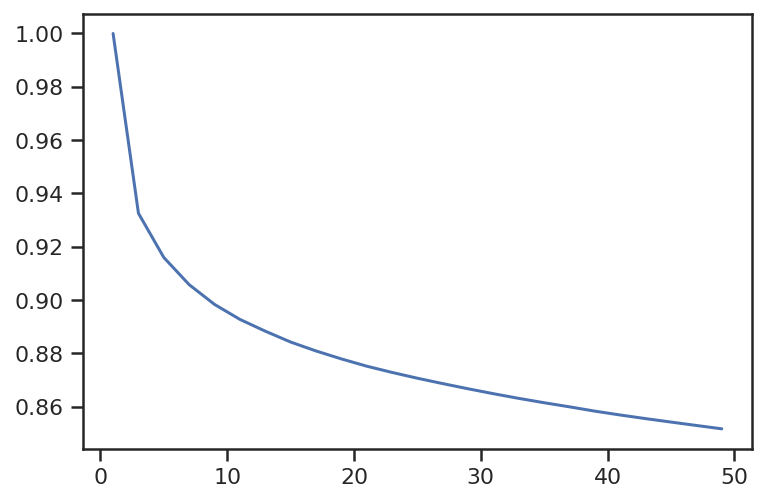

In [40]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

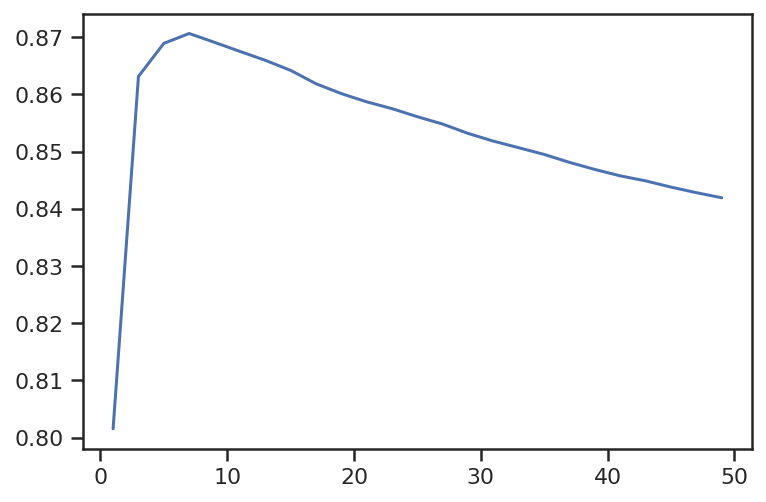

In [41]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [42]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 56.07154831829942
median_absolute_error: 4.7735714285714295
r2_score: 0.8687906728428422


In [43]:
test_model(knn_5)

mean_absolute_error: 55.39857905041605
median_absolute_error: 4.017000000000004
r2_score: 0.8677873476991447


In [44]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

In [45]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

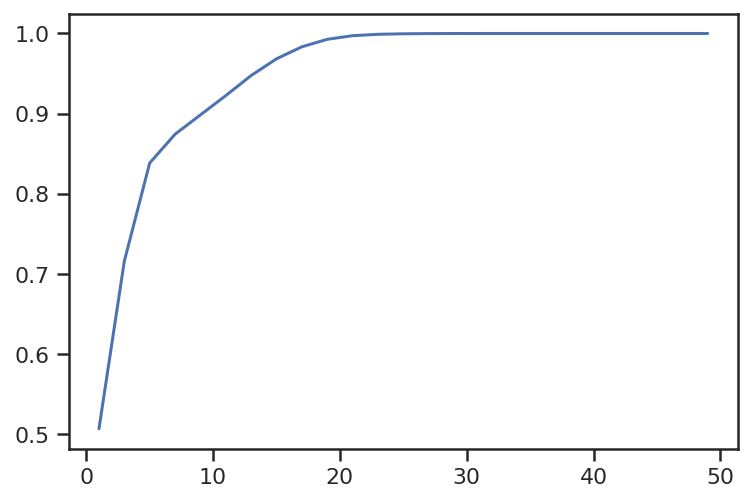

In [46]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

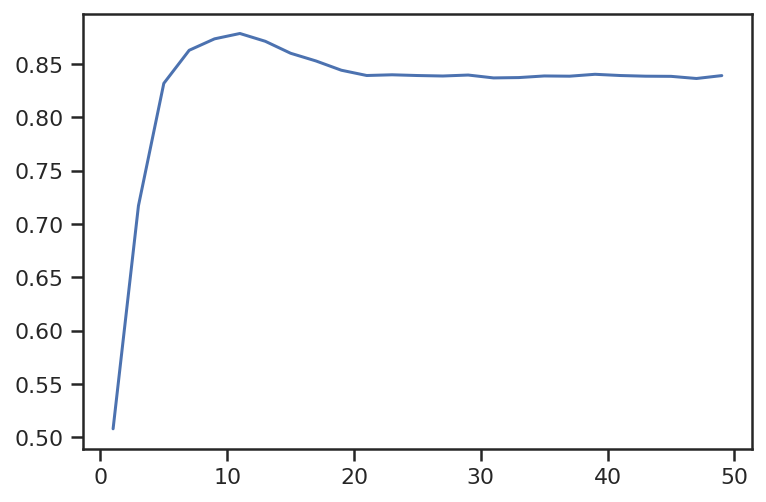

In [47]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [48]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 48.64952620211984
median_absolute_error: 0.8996284533171242
r2_score: 0.8698659717172621


In [49]:
test_model(dt_none)

mean_absolute_error: 49.344193587860985
median_absolute_error: 0.7300000000000002
r2_score: 0.8353816813206594


In [50]:
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

In [51]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

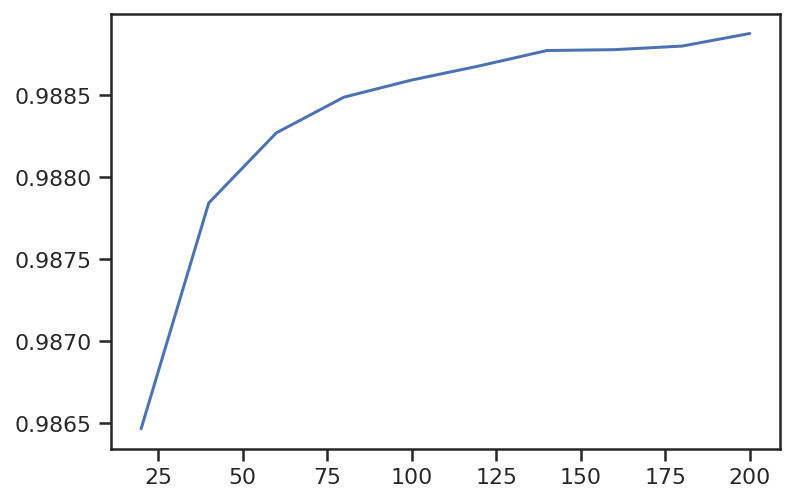

In [52]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

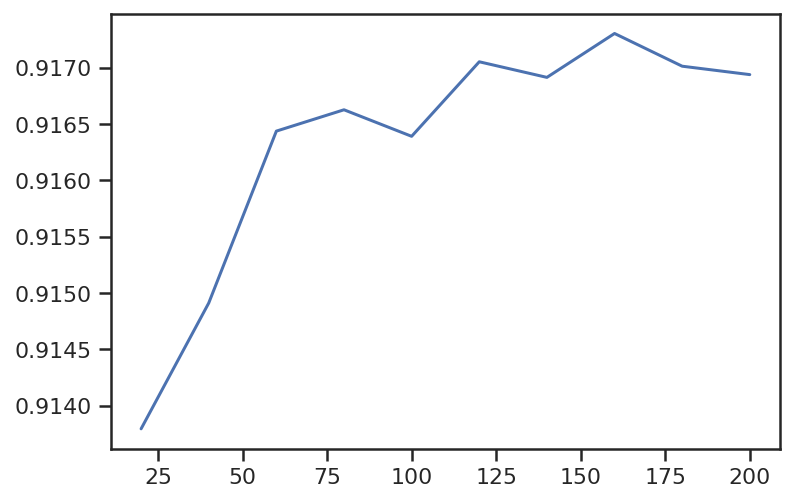

In [53]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [54]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 37.691652770129714
median_absolute_error: 0.5924375000000003
r2_score: 0.916763346693607


In [55]:
test_model(ran_100)

mean_absolute_error: 38.13152227116986
median_absolute_error: 0.5892500000000002
r2_score: 0.9152695580703655
